# Introduction

**Nama** : Syarief Qayum Suaib

**Batch** : FTDS 043

**Objective** : The main objective of this milestones 2 is for students as a data scientist to understand the ovrall concept of Machine Learning from end to end. It begins with data preparation through business undersating, problem identification, EDA, Feature Engineering and lastly the Supervised Modelling.

Furthermore, in this project we are also encourage to do a comprehensive evaluation by looking at baseline model and hypertuned model as the comparison. Finally, the final output is to perform a running model deployment using streamlit in HuggingFace.

### Business Understanding

A University in India with an MBA Program aim to maximize graduate job placement and effectively support their students to excel in their career.

However, they are face with a problem with a lack of a data-driven understanding of how specific academic and non-academic factors can truly influence their placement success. Without this insights it will be hard to identify tailored advice for the Students and use internal resources from the university to boost overall placement numbers.

Creating a diruptive predicition tools using the students past information available at university will help to assess the likelihood of getting a job placement. The main goal is to increase the employability of the MBA students of the university.

### Problem Statement

The University with MBA Program struggle to improve graduate job placement and wants to find a way to support students to increase the employabilty.

### Data Understanding

**Dataset Description**

This dataset contains information about MBA students and factors influencing their campus placement. It includes academic performance metrics, demographic information, and work experience details for 215 students.

**Context**

This dataset is based on internal campus data from a university in India offering an MBA program. The aim is to understand the various academic and non-academic factors that contribute to a student's success in securing a job placement after graduation.

**Content**

The dataset includes the following information for each student:

*   **Academic Performance:** Secondary school percentage, higher secondary school percentage, degree percentage, entrance test percentage, and MBA percentage.
*   **Demographic and Background Information:** Gender, secondary school board, higher secondary school board, higher secondary specialization, and degree type.
*   **Work Experience:** Whether the student has prior work experience.
*   **Placement Status:** Whether the student was placed or not placed. (This is target variable)
*   **Salary:** The salary offered if the student was placed (This is another target variable)

### Breaking Down The Problem with Questions

Based on the problem statemet and data understanding these are the question that we can answer during the Exploratory Data Analysis;

1. What is the distribution of students across different categorical features like Gender, Work Experience, and Degree Types?

2. How are the numerical features such as academic percentages and entrance test scores distributed?

3. What are the linear relationships between the numerical features?

4. Is there a class imbalance in the target variable, Placement Status?

5. How do academic performances during school years relate to job placement status, and are there any visible patterns or separations?

6. What are the placement rates for each type of degree?

7. Do having work experience affect a students job placement?

# Import Libraries

We started the project by grabbing all the necessary tools needed for data handling, analysis, modelling and visualization.

In [211]:
!pip install feature_engine


In [212]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data splitting and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Model algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV


# Model evaluation metrics and tools
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, cross_val_score

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Handling imbalanced data
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE

# Outlier handling
from feature_engine.outliers import Winsorizer

# Multicollinearity check (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Data Loading

We then loaded the dataset that we gather from kaggle dataset about [Campus Recruitment](https://www.kaggle.com/datasets/benroshan/factors-affecting-campus-placement?select=Placement_Data_Full_Class.csv), in this section we also preformed initial checks on the data, missing values, shape and basic statistics

In [213]:
# Load the dataset
df = pd.read_csv('Placement_Data_Full_Class.csv')

In [214]:
# Check Headers
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


### Change Columns Names

We found some of the column names are not really representing the columns. Therefore, we proceed to change column `workex` to `work_experience` and `status` to `placement status` to get a relevant naming.

In [215]:
# Change Columns Names (ssc_p, ssc_b, hsc_p, hsc_b, degree_p, etest_p, mba_p, hsc_s, degree_t)
df = df.rename(columns={
    'ssc_p': 'secondary_percentage',
    'ssc_b': 'secondary_board',
    'hsc_p': 'higher_secondary_percentage',
    'hsc_b': 'higher_secondary_board',
    'degree_p': 'degree_percentage',
    'etest_p': 'entrance_test_percentage',
    'mba_p': 'mba_percentage',
    'hsc_s': 'higher_secondary_specialization',
    'degree_t': 'degree_type'
})

# Change Columns Names (workex, status)
df = df.rename(columns={
    'workex': 'work_experience',
    'status': 'placement_status'
})

### Drop Unused Columns

We are dropping column `sl_no` as it was used as index and doesn't represent each rows for an interpretation


In [216]:
# Drop unused columns
df = df.drop(columns=['sl_no'])

We convert columns names to title case for readabilty and make sure everything spelled consistently

In [217]:
# Change Columns Names to title case
df.columns = df.columns.str.title()

### Check Unique Values

In [218]:
# Display Unique values in each column
print("Unique values in each column:")
df.nunique()

Unique values in each column:


,0
Gender,2
Secondary_Percentage,103
Secondary_Board,2
Higher_Secondary_Percentage,97
Higher_Secondary_Board,2
Higher_Secondary_Specialization,3
Degree_Percentage,89
Degree_Type,3
Work_Experience,2
Entrance_Test_Percentage,100


### Check for Missing Values

In [219]:
# Display missing values in each column
print("Missing values in each column:")
df.isnull().sum()

Missing values in each column:


,0
Gender,0
Secondary_Percentage,0
Secondary_Board,0
Higher_Secondary_Percentage,0
Higher_Secondary_Board,0
Higher_Secondary_Specialization,0
Degree_Percentage,0
Degree_Type,0
Work_Experience,0
Entrance_Test_Percentage,0


We found missing values in the column `salary`, these are the student in the dataset that ended up didn't get a placement so they are not assigned with salary information.

We will handle this missing values in the later stages after data exploration.

# Exploratory Data Analysis

Let's looks closely on the dataset and explore a lil bit then answer some basic questions from the problem statement.

We will use summary and charts on this chapter to find the patterns and pull a summary.

In [220]:
# Display Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Gender                           215 non-null    object 
 1   Secondary_Percentage             215 non-null    float64
 2   Secondary_Board                  215 non-null    object 
 3   Higher_Secondary_Percentage      215 non-null    float64
 4   Higher_Secondary_Board           215 non-null    object 
 5   Higher_Secondary_Specialization  215 non-null    object 
 6   Degree_Percentage                215 non-null    float64
 7   Degree_Type                      215 non-null    object 
 8   Work_Experience                  215 non-null    object 
 9   Entrance_Test_Percentage         215 non-null    float64
 10  Specialisation                   215 non-null    object 
 11  Mba_Percentage                   215 non-null    float64
 12  Placement_Status      

As we can see from the summary above we there is a columns that we discussed has null value, we will handle this in the later stage.

For data type, they are already well represented.

In [221]:
# Display the shape of the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (215, 14)


In [222]:
# Display basic statistics
print("Basic statistics of the dataset")
df.describe().T

Basic statistics of the dataset


,count,mean,std,min,25%,50%,75%,max
Secondary_Percentage,215.0,67.303395,10.827205,40.89,60.600,67.0,75.700,89.40
Higher_Secondary_Percentage,215.0,66.333163,10.897509,37.00,60.900,65.0,73.000,97.70
Degree_Percentage,215.0,66.370186,7.358743,50.00,61.000,66.0,72.000,91.00
Entrance_Test_Percentage,215.0,72.100558,13.275956,50.00,60.000,71.0,83.500,98.00
Mba_Percentage,215.0,62.278186,5.833385,51.21,57.945,62.0,66.255,77.89
Salary,148.0,288655.405405,93457.452420,200000.00,240000.000,265000.0,300000.000,940000.00


### 1️⃣ Distribution of Categorical Features

First of all lets provide ourself with a context by looking at the distribution of categorical features. This section will help us to spot categories which can have an impact to our target variable as well identifying if thre are imbalance categories

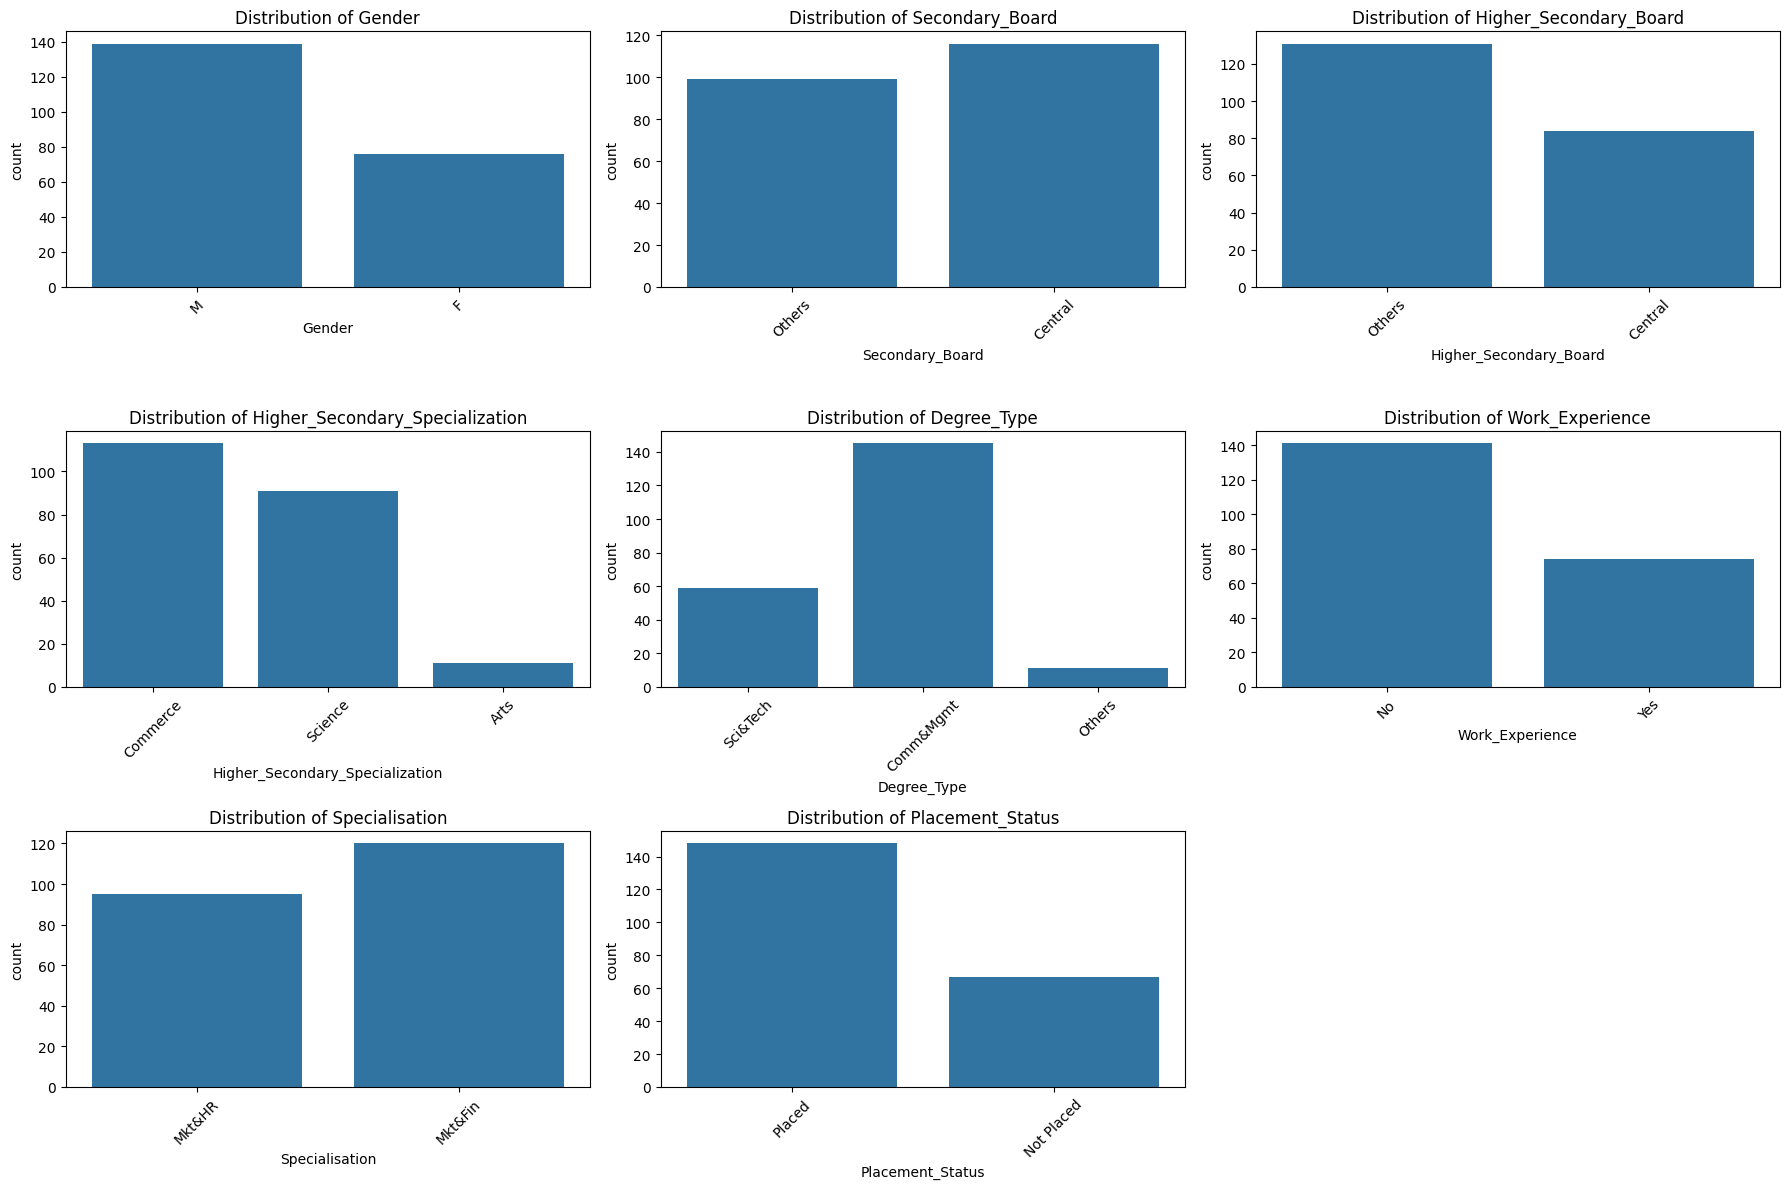

In [223]:
# Display Distribution of Categorical Features

categorical_columns = df.select_dtypes(include=['object']).columns
n_cols = 3
n_rows = int(np.ceil(len(categorical_columns) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    sns.countplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Key insights from the distribution of categorical features;

- There are more male compared to female students on the study.
- Most of the students has no prior work experience.
- Comm&Mgmt are the most popular major at university amongst all the students.
- While on the MBA degree more students studies Mkt&Fin.
- There more students that landed a job compared than students who are failed.


### 2️⃣ Distribution of Numerical Features

Lets identify the spread of the values on our Numerical Features, in this step we can visually spot the outliers and detect extreme values that might affect our later stage of modelling.

It is also important to show us the variablity and central tendency of how much the data varies.

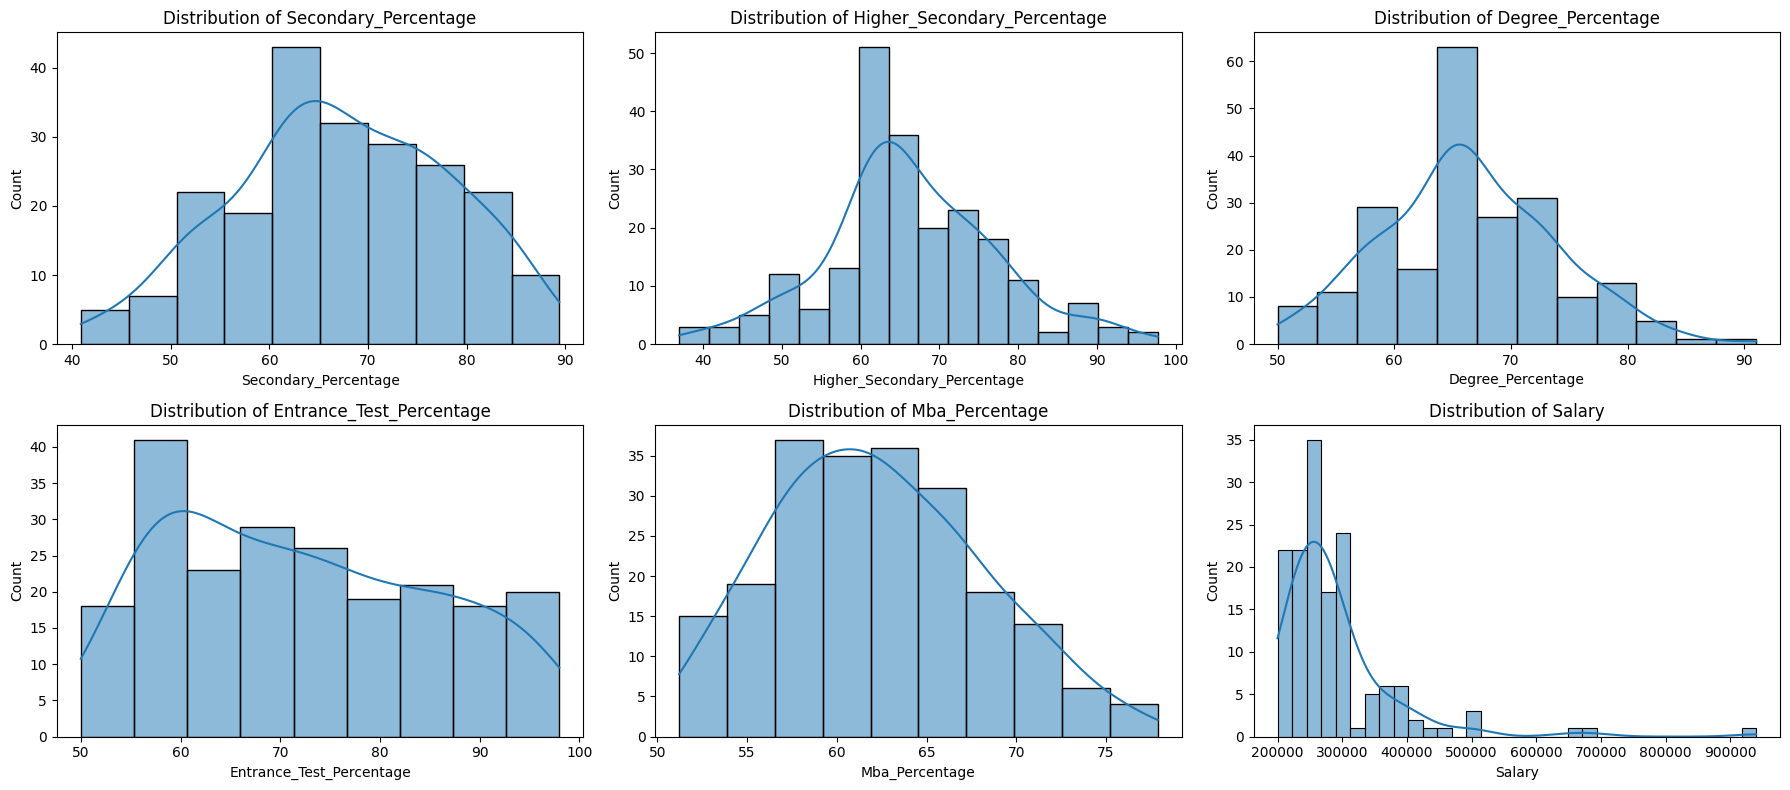

In [224]:
# Display Distribution of Numerical Features
numerical_columns = df.select_dtypes(include=[np.number]).columns
n_cols = 3
n_rows = int(np.ceil(len(numerical_columns) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- As we can see visually observe from histogram plot above all the features appears to show **bell-shaped** almost normally **distributed** with only slighty skewed.

- The exception is at `salary` that appears to be **highly skewed to the right**, with most salaries is concentrated on left side of the chart in the lower bracket

### 3️⃣ Correlation Matrix

After exploring the numerical distribution, let's understand relationnship for each variable using the correlation matrix.

This will clearly tells us the **linear relationship** between our numerical variables.

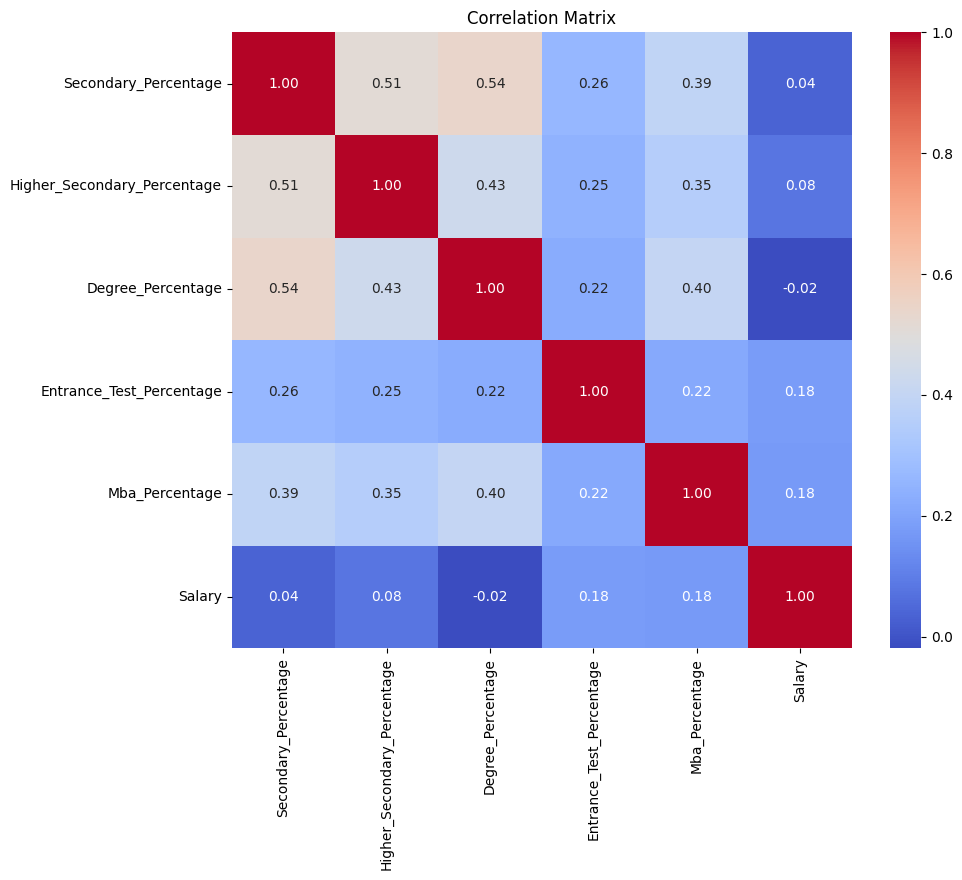

In [225]:
# Correlation analysis for numerical features in a dataframe

numerical_columns = df.select_dtypes(include=[np.number]).columns
correlation = df[numerical_columns].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Key insights from the correlation matrix:

- Interstingly from the data we can see that academic percentages shown as Secondary, Higher Secondary and Degree to MBA scores doesn't determine how much a students earn. ➡ The correaltion is in blue shades close to 0 (weaker relationship)

- However, we can see consistent correlation accross all scores during school period (Secondary,Higher and Degree), it means Students consistently score better during school periods. ➡ The correlation in bright red close to 1 (moderate relationship)

### 4️⃣ Target Variable Distribution

In the previous part of our EDA, we mentioned briefly about the target variable. Let’s dive deeper and visualize the distribution of the target variable `Placement_Status` to see if there’s a class imbalance.

In [226]:
# Check class distribution for Placement_Status
print(df['Placement_Status'].value_counts())

Placement_Status
Placed        148
Not Placed     67
Name: count, dtype: int64


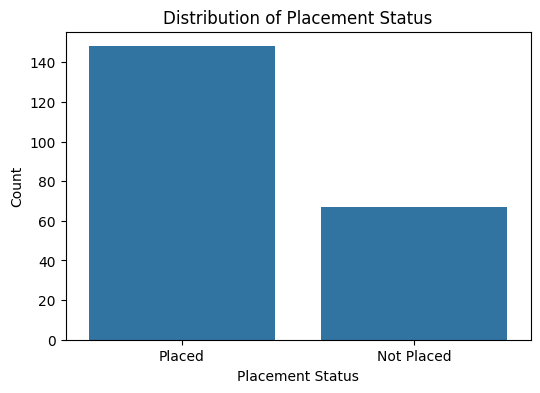

Placement_Status
Placed        0.688372
Not Placed    0.311628
Name: proportion, dtype: float64


In [227]:
# Display Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Placement_Status')
plt.title('Distribution of Placement Status')
plt.xlabel('Placement Status')
plt.ylabel('Count')
plt.show()
print(df['Placement_Status'].value_counts(normalize=True))

Our **target variable is the job placement status of the students**. with the outcome that will predict whether students is `placed` or `not placed`.

We will be using other information in numerical and categorical features such as degree scores, background and skills to predict the outcome.

Above we can see there is an imbalance between student with **68%** who are placed and the rest 31% are not getting a job placement.

With this imbalance, we can decide to use **SMOTE** method to get the class balance to improve our model.

### 5️⃣ Pairplot (Academic Years Scores on Placement Status)



The next EDA in this project is Pairplotting, which visually colors the `placement_status` to show the relationship between selected variables and the separation, clustering, and linearity on the plot.

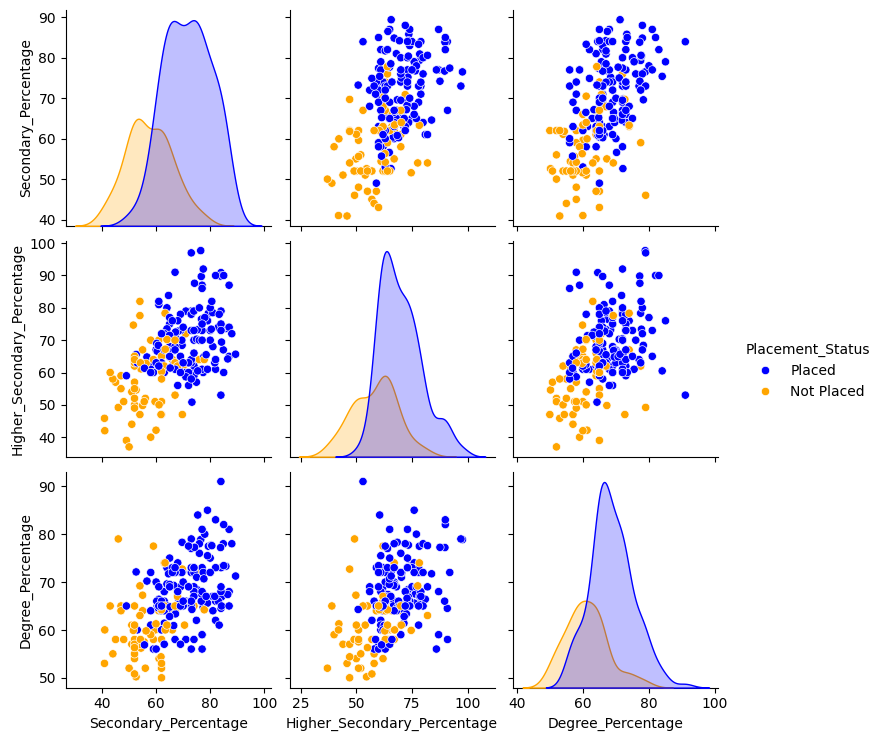

In [228]:
# Display pairplot
selected_cols = list(numerical_columns[:3]) + ['Placement_Status']
sns.pairplot(df[selected_cols], hue='Placement_Status', hue_order=['Placed', 'Not Placed'], palette={'Placed': 'blue', 'Not Placed': 'orange'})
plt.show()

As we discussed on the correlation heatmap earlier that academic performance during school years matter in determining job placement status. From the the result above we can visually get key insights as follows;

- The students who are getting a job/place are in blues generally have a higher percentage compared to the students not placed in oranges.

- However, the nuance of this plot also tells us that there are students who are in blue or placed are in the lower percentage area or overlapping, meaning if one of their scores during academic years not performing well, there is still a chance of they will get placed.

### 6️⃣ Placement Rate by Degree Types

Let's answer some of the questions that pops up before we dive in to the EDA.

**"What are the placement rates for each type of degree?"**

We can answer that by slicing through the dataset by filtering on `Degree_Type`

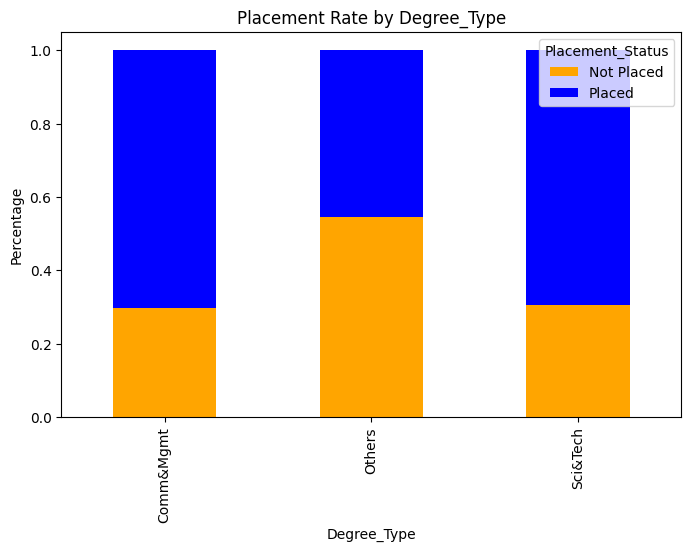

Placement_Status,Not Placed,Placed
Degree_Type,,
Comm&Mgmt,0.296552,0.703448
Others,0.545455,0.454545
Sci&Tech,0.305085,0.694915


In [229]:
cat_col = 'Degree_Type' if 'Degree_Type' in df.columns else categorical_columns[0]
placement_rate = df.groupby(cat_col)['Placement_Status'].value_counts(normalize=True).unstack().fillna(0)
placement_rate.plot(kind='bar', stacked=True, figsize=(8,5), color={'Placed': 'blue', 'Not Placed': 'orange'})
plt.title(f'Placement Rate by {cat_col}')
plt.ylabel('Percentage')
plt.show()

placement_rate

Some of the key insights from the placement rate by degree above as follows;

- We can see from the bar plot above `Comm&Mgmt` and `Sci&Tech` degrees stduents are performing better. With more than ~70% of students from this two majors are being placed.

- The students that are in the `others` group has a lower placement rate with only less than 55% are not being placed.

### 7️⃣ Placement Rate by Work Experience

The next interesting questions to answer from this EDA is

**"Do having work experience affect a students job placement?"**

We can answer that by slicing through the dataset by filtering on `Work_Experience`

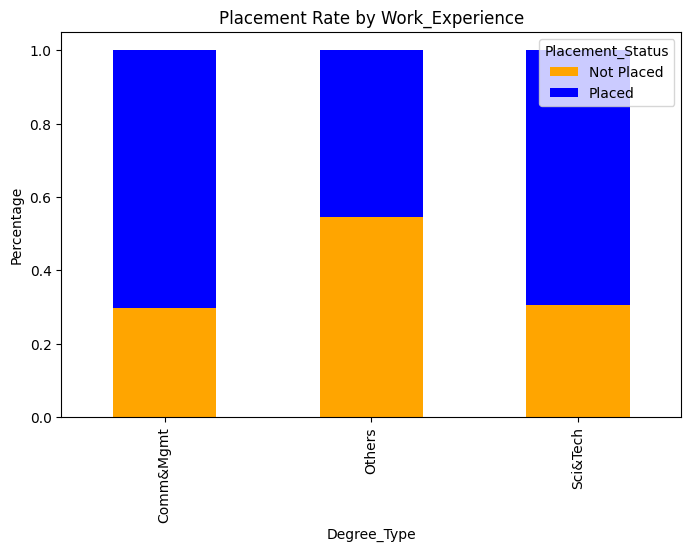

Placement_Status,Not Placed,Placed
Work_Experience,,
No,0.404255,0.595745
Yes,0.135135,0.864865


In [230]:
cat_col = 'Work_Experience' if 'Work_Experience' in df.columns else categorical_columns[0]
placement_rate_we = df.groupby(cat_col)['Placement_Status'].value_counts(normalize=True).unstack().fillna(0)
placement_rate.plot(kind='bar', stacked=True, figsize=(8,5),  color={'Placed': 'blue', 'Not Placed': 'orange'})
plt.title(f'Placement Rate by {cat_col}')
plt.ylabel('Percentage')
plt.show()

placement_rate_we

Some of the key insights from the placement rate by work experience above as follows;

- `Work_Experience` is a strong predictor that indicates the likelyhood of a students of being placed after the programs, with around 86% those who had work previously able to be placed for a job.

- Conversely, those students who had no prior job are still likely to get a job by only 59%, however the 49% of the rest of that group failed to get a placement.

- Interestingly, those who has job experience can still not being placed altought is likely with only around 13.5%

# Feature Engineering

The next steps after EDA we will conduct feature engineering. In this section we will be splitting the datasets to train and test sets, check cardinality, encode the target variable and checking anomalies such as outliers using skewness test and multicollinearity using VIF test.

### Split Data into Train and Test Sets


We are splitting the data set by setting the variable `X` as the features and variable `y` as the target variable.

This important steps to prevent data leakage during the model training and evaluation.

In [231]:
# Split the dataset into features and target variable
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Placement_Status'])
y = df['Placement_Status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (172, 13)
Testing set shape: (43, 13)


#### Encode the Target Variable

We will use the label encoder to encode the target variable `Placement_Status` as in only have two classes.

Some of the models that we will use needed the target variable to be encoded, to have a seamless process, we will encode it earlier outside the pipeline.

- 0 represents 'Not Placed'
- 1 represents 'Placed'

In [232]:
# Encode the target variable

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

display(le)
print(y_train)

LabelEncoder()

[0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1
 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0
 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1]


### Check Cardinality

We will check the cardinality to categorical features that has too many unique values to prevent overfitting

In [233]:
# Check for Cardinality
for column in categorical_columns:
    cardinality = df[column].nunique()
    print(f"Cardinality of {column}: {cardinality}")

Cardinality of Gender: 2
Cardinality of Secondary_Board: 2
Cardinality of Higher_Secondary_Board: 2
Cardinality of Higher_Secondary_Specialization: 3
Cardinality of Degree_Type: 3
Cardinality of Work_Experience: 2
Cardinality of Specialisation: 2
Cardinality of Placement_Status: 2


The cardinality of our categorical features is low, we can do one-hot label for the modelling on the next phase.

### Check for Outliers

We will also check the outliers of each numerical columns if there are data points that are highly unusual using Tukey's rules.

In [234]:
# Show Outliers percentage
def outlier_percentage(column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers) / len(df) * 100

print("Outlier percentages:")
print()
for column in numerical_columns:
    print(f"{column}: {outlier_percentage(column):.2f}%")

Outlier percentages:

Secondary_Percentage: 0.00%
Higher_Secondary_Percentage: 3.72%
Degree_Percentage: 0.47%
Entrance_Test_Percentage: 0.00%
Mba_Percentage: 0.00%
Salary: 6.98%


From the outliers test above we can see that a low percetange of outliers can be found on the features.

- We can accept the outliers on features `Higher_Secondary_Percentage` and and `Degree_Percentage` since a low percentage of them exist.

- A sligtly higher number of outliers can be seen on `Salary` since the there are students who are offered higher salary and its ranging from lower to higher brackets.

We will not be worry about the `salary` for now as we will handle it in the later stages.

### Skewness Test

To assess the normality of the data distribution we will do a skewness test, as we have analyze visually on the EDA at the distrubtion plot, we will again asses the skewness by looking at coefficient to be 0 = no skew.

In [235]:
# Check for Skewness and Show in a DataFrame
def skewness_analysis(column):
    skewness = df[column].skew()
    return pd.DataFrame({'Column': [column], 'Skewness': [skewness]})
skewness_df = pd.concat([skewness_analysis(col) for col in numerical_columns], ignore_index=True)

skewness_df['Skewness Category'] = pd.cut(skewness_df['Skewness'], bins=[-np.inf, -0.5, 0.5, np.inf], labels=['High Negative', 'Low', 'High Positive'])
display(skewness_df)

,Column,Skewness,Skewness Category
0,Secondary_Percentage,-0.132649,Low
1,Higher_Secondary_Percentage,0.163639,Low
2,Degree_Percentage,0.244917,Low
3,Entrance_Test_Percentage,0.282308,Low
4,Mba_Percentage,0.313576,Low
5,Salary,3.569747,High Positive


We can see from the numerical features above shows a low skewness close to 0 means that they are symmetrically distributed.

However, we can see on the `salary` is postively skewed, again this due to range of salary from the higher bracket that pulls the distribution towards right skewed

### Multicollinearity Test

Lastly, in the feature engineering we will be looking at the Multicollineratiy test where we will identify if each variables are strongly related to each others.

In [236]:
# Multicollinearity Check using VIF
# Select only numerical columns for VIF calculation
X_vif = df[numerical_columns].dropna().copy()

# Add a constant for intercept
import statsmodels.api as sm
X_vif = sm.add_constant(X_vif)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

display(vif_data)

,Feature,VIF
0,const,175.614828
1,Secondary_Percentage,1.373523
2,Higher_Secondary_Percentage,1.197616
3,Degree_Percentage,1.412672
4,Entrance_Test_Percentage,1.214669
5,Mba_Percentage,1.589537
6,Salary,1.074527


From the multicollinearity test above, it shows all the features that we have in our dataset show a Low Multicollinerity with VIF values < 5.

This indicates that there is no significant multicollinearity between all the variables or they not corrrelated to one another.

**Bottomline**

Safely said on the feature engineering part we will not drop any of the faetures as they are all passed the outliers, skewness and multicollinearity tests.

We will move forward using all the features for modelling. Except, for `Salary` feature which indicates a missing values and represent those students who are not being placed.


# Model Definition (Baseline)

In this section of the project we will set the preprocessing steps and set up pipelines for different machine learning models.

The models that we will test as the baseline models using default parameter in this project are;

- Random Forest
- Decision Tree
- KNN
- SVM
- XGBoost

#### Define Numerical and Categorical features

The first essentsial steps on this section is to declare the final numerical and categorical features;

- Numerical: we will drop `Salary` feature because it represent the outcome or the Y variable (It the result after the target happen or after job placement). This will avoid us from data leakage.

- Categorical: we will drop the target variable or `Placement_Status`

In [237]:
# Define numerical and categorical features
numerical_features = df.select_dtypes(include=np.number).drop(columns=['Salary']) # Exclude 'Salary' from numerical features
categorical_features = df.select_dtypes(exclude=np.number).drop(columns=['Placement_Status']) # Exclude 'Placement_Status' from categorical features

#### Pre Processing

All preprocessing steps (missing value imputation, encoding, scaling) in this project will be handled inside the pipeline for every model. Again, this to ensures no data leakage.

In [238]:
# Numerical and categorical pipelines
num_pipeline = Pipeline([
    ('winsorizer', Winsorizer(capping_method='iqr', tail='both', fold=1.5)),
])

num_pipeline_scaler = Pipeline([
    ('winsorizer', Winsorizer(capping_method='iqr', tail='both', fold=1.5)),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', num_pipeline, numerical_features.columns),
    ('cat', cat_pipeline, categorical_features.columns)
])

# ColumnTransformer with scaler
preprocessor_1 = ColumnTransformer([
    ('num', num_pipeline_scaler, numerical_features.columns),
    ('cat', cat_pipeline, categorical_features.columns)
])

We are using column transformer form scikit-learn to create a preprocessing pipeline.

For the numerical features we will include;

- **Winsorizer** to cap extreme values or outliers, this wil help to minimize the impacts without removing the data points.

- We also use **StandardScaler** for KNN & SVM as it less sensitive to outliers

For the categorical features we will include;

- We will **One-Hot Encoding** for the categorical features to manage cardinality and treats each values seperately.

In [239]:
print('Transformer:')
print()
display(preprocessor)
print()
print('Transformer with Scaler:')
print()
display(preprocessor_1)

Transformer:



ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('winsorizer',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             tail='both'))]),
                                 Index(['Secondary_Percentage', 'Higher_Secondary_Percentage',
       'Degree_Percentage', 'Entrance_Test_Percentage', 'Mba_Percentage'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['Gender', 'Secondary_Board', 'Higher_Secondary_Board',
       'Higher_Secondary_Specialization', 'Degree_Type', 'Work_Experience',
       'Specialisation'],
      dtype='object'))])


Transformer with Scaler:



ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('winsorizer',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             tail='both')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['Secondary_Percentage', 'Higher_Secondary_Percentage',
       'Degree_Percentage', 'Entrance_Test_Percentage', 'Mba_Percentage'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['Gender', 'Secondary_Board', 'Higher_Secondary_Board',
       'Higher_Secondary_Specialization', 'Degree_Type', 'Work_Experience',
       'Specialisation'],
      dtype='object'))])

#### Model Pipelines

After preprocessing with transformer then we will integrate the numerical and categorical features into the pipelines with **SMOTE** to handle the class imbalance (we cover it on EDA earlier) and train them using different models as follows;

##### **Random Forest**

In [240]:
# Random Forest Pipeline (Improved)
pipe_rf = make_pipeline_imb(
    preprocessor,
    SMOTE(random_state=42),
    RandomForestClassifier(random_state=42)
)

pipe_rf

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both'))]),
                                                  Index(['Secondary_Percentage', 'Higher_Secondary_Percentage',
       'Degree_Percentage', 'Entrance_Test_Percentage', 'Mba_Percentage'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Secondary_Board', 'Higher_Secondary_Board',
       'Higher_Secondary_Specialization', 'Degree_Type', 'Work_Experience',
       'Specialisation'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

The first model that we use Random Forest, a model that combines prediciton of each tree to reduce overfitting and improve robustness.

Random Forest doesn't require feature scaling as the decision based on threshold on each individual trees. We still use Encoding on categorical features.

##### **Decision Tree**

In [241]:
# Decision Tree Pipeline (Improved)
pipe_dt = make_pipeline_imb(
    preprocessor,
    SMOTE(random_state=42),
    DecisionTreeClassifier(random_state=42)
)

pipe_dt

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both'))]),
                                                  Index(['Secondary_Percentage', 'Higher_Secondary_Percentage',
       'Degree_Percentage', 'Entrance_Test_Percentage', 'Mba_Percentage'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Secondary_Board', 'Higher_Secondary_Board',
       'Higher_Secondary_Specialization', 'Degree_Type', 'Work_Experience',
       'Specialisation'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

Same as the previous model Decision Trees is a simple model that doesn't require feature scaling. This model splits data repeatedly based on each feature values and it provides simple intrepretable result for our baseline comparison.

##### **KNN**

In [242]:
# KNN Pipeline (Improved)
pipe_knn = make_pipeline_imb(
    preprocessor_1,
    SMOTE(random_state=42),
    KNeighborsClassifier()
)

pipe_knn

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Secondary_Percentage', 'Higher_Secondary_Percentage',
       'Degree_Percentage', 'Entrance_Test_Percentage', 'Mba_Percentage'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Secondary_Board', 'Higher_Secondary_Board',
       'Higher_Secondary_Specialization', 'Degree_Type', 'Work_Experience',
       'Specialisation'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('kneighborsclassifier', KNeighborsClassifier())])

K-Nearest Neigbors is a model that workks by classifies a new data point based on the majority of class of its closes 'k' neighbors.

As its work with distance based algorithm KNN is sensitive to feature scaling as it relies on distance. Therefore, in this model use StandardScaler for the numerical features to ensure equal distance.

##### **SVM**

In [243]:
# SVM Pipeline (Improved)
pipe_svm = make_pipeline_imb(
    preprocessor_1,
    SMOTE(random_state=42),
    SVC(probability=True, random_state=42)
)

pipe_svm

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Secondary_Percentage', 'Higher_Secondary_Percentage',
       'Degree_Percentage', 'Entrance_Test_Percentage', 'Mba_Percentage'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Secondary_Board', 'Higher_Secondary_Board',
       'Higher_Secondary_Specialization', 'Degree_Type', 'Work_Experience',
       'Specialisation'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('svc', SVC(probability=True, random_state=42))])

The next model that we use is Support Vector Machine. This models aim to find the best hyperlane separataing classes with the largest margin.

In this model, we use StandardScaler as it is very sensitive to scale of features for it to perform and converge properly.

##### **XGBoost**

In [244]:
# XGBoost Pipeline (Improved)
from sklearn.preprocessing import LabelEncoder

pipe_xgb = make_pipeline_imb(
    preprocessor,
    SMOTE(random_state=42),
    XGBClassifier(eval_metric='logloss', random_state=42)
)

pipe_xgb

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both'))]),
                                                  Index(['Secondary_Percentage', 'Higher_Secondary_Percentage',
       'Degree_Percentage', 'Entrance_Test_Percentage', 'Mba_Percentage'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncod...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

The last model that we use is Extreme Gradient Boosting.

Why? Because this is the model that can yiel high accuracy on a well structured data like ours. Similiar with Random Forest and Decision Tree this model is less sensitive to outliers and doesn't require feature scaling.

For binary classification in our project this models works well as it combine all tree predicitions to get a probability of 0 or 1 for the class.

# Model Training & Evaluation

After setting up the Baseline model using pipeline, we are moving forward to section where we train the model on the training data and evaluate its performance.

We will be using classfication reports along with confusion matrics to asses the effectiveness of the model.

### Model Training

##### Random Forest

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both'))]),
                                                  Index(['Secondary_Percentage', 'Higher_Secondary_Percentage',
       'Degree_Percentage', 'Entrance_Test_Percentage', 'Mba_Percentage'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Secondary_Board', 'Higher_Secondary_Board',
       'Higher_Secondary_Specialization', 'Degree_Type', 'Work_Experience',
       'Specialisation'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.58      0.64        12
           1       0.85      0.90      0.88        31

    accuracy                           0.81        43
   macro avg       0.77      0.74      0.76        43
weighted avg       0.81      0.81      0.81        43



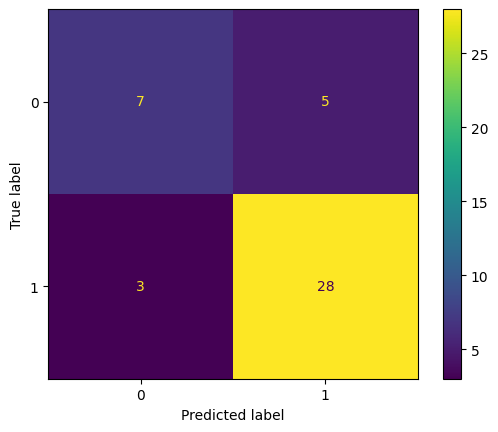

Confusion Matrix:
[[ 7  5]
 [ 3 28]]


In [245]:
# Fit the pipeline
display(pipe_rf.fit(X_train, y_train))

# Predict and evaluate
y_pred_rf = pipe_rf.predict(X_test)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


# Plot Confusion Matrix
confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf)).plot()
plt.show()

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

##### Decision Tree

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both'))]),
                                                  Index(['Secondary_Percentage', 'Higher_Secondary_Percentage',
       'Degree_Percentage', 'Entrance_Test_Percentage', 'Mba_Percentage'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Secondary_Board', 'Higher_Secondary_Board',
       'Higher_Secondary_Specialization', 'Degree_Type', 'Work_Experience',
       'Specialisation'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.58      0.58        12
           1       0.84      0.84      0.84        31

    accuracy                           0.77        43
   macro avg       0.71      0.71      0.71        43
weighted avg       0.77      0.77      0.77        43



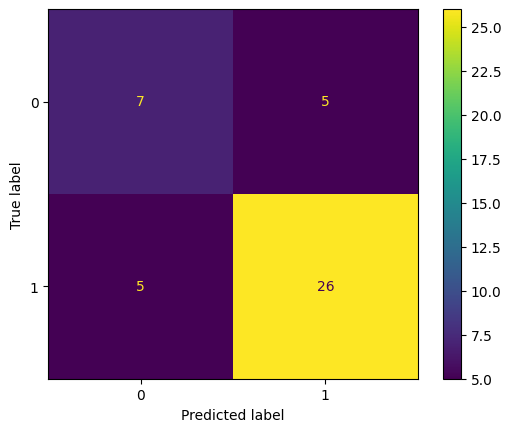

Confusion Matrix:
[[ 7  5]
 [ 5 26]]


In [246]:
# Fit the pipeline
display(pipe_dt.fit(X_train, y_train))

# Predict and evaluate
y_pred_dt = pipe_dt.predict(X_test)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))


# Plot Confusion Matrix
confusion_matrix(y_test, y_pred_dt)
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_dt)).plot()
plt.show()

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

##### KNN

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Secondary_Percentage', 'Higher_Secondary_Percentage',
       'Degree_Percentage', 'Entrance_Test_Percentage', 'Mba_Percentage'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Secondary_Board', 'Higher_Secondary_Board',
       'Higher_Secondary_Specialization', 'Degree_Type', 'Work_Experience',
       'Specialisation'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('kneighborsclassifier', KNeighborsClassifier())])

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.83      0.71        12
           1       0.93      0.81      0.86        31

    accuracy                           0.81        43
   macro avg       0.78      0.82      0.79        43
weighted avg       0.84      0.81      0.82        43



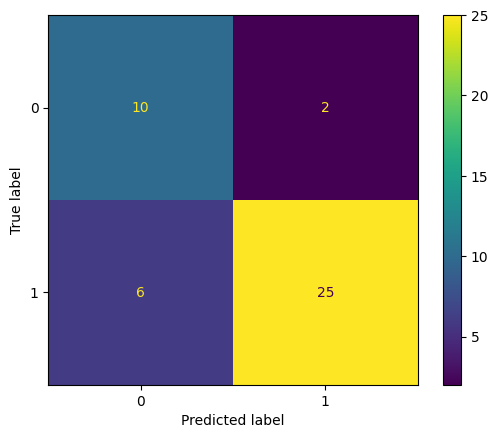

Confusion Matrix:
[[10  2]
 [ 6 25]]


In [247]:
# Fit the pipeline
display(pipe_knn.fit(X_train, y_train))

# Predict and evaluate
y_pred_knn = pipe_knn.predict(X_test)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))


# Plot Confusion Matrix
confusion_matrix(y_test, y_pred_knn)
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_knn)).plot()
plt.show()

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

##### SVM

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Secondary_Percentage', 'Higher_Secondary_Percentage',
       'Degree_Percentage', 'Entrance_Test_Percentage', 'Mba_Percentage'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Secondary_Board', 'Higher_Secondary_Board',
       'Higher_Secondary_Specialization', 'Degree_Type', 'Work_Experience',
       'Specialisation'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('svc', SVC(probability=True, random_state=42))])

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.88      0.94      0.91        31

    accuracy                           0.86        43
   macro avg       0.84      0.80      0.82        43
weighted avg       0.86      0.86      0.86        43



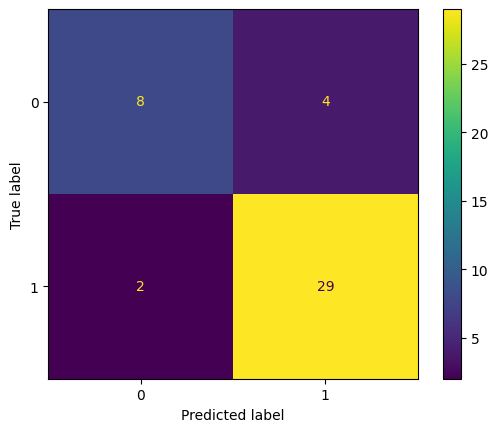

Confusion Matrix:
[[ 8  4]
 [ 2 29]]


In [248]:
# Fit the pipeline
display(pipe_svm.fit(X_train, y_train))

# Predict and evaluate
y_pred_svm = pipe_svm.predict(X_test)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))


# Plot Confusion Matrix
confusion_matrix(y_test, y_pred_svm)
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_svm)).plot()
plt.show()

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

##### XGBoost

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both'))]),
                                                  Index(['Secondary_Percentage', 'Higher_Secondary_Percentage',
       'Degree_Percentage', 'Entrance_Test_Percentage', 'Mba_Percentage'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncod...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.88      0.94      0.91        31

    accuracy                           0.86        43
   macro avg       0.84      0.80      0.82        43
weighted avg       0.86      0.86      0.86        43



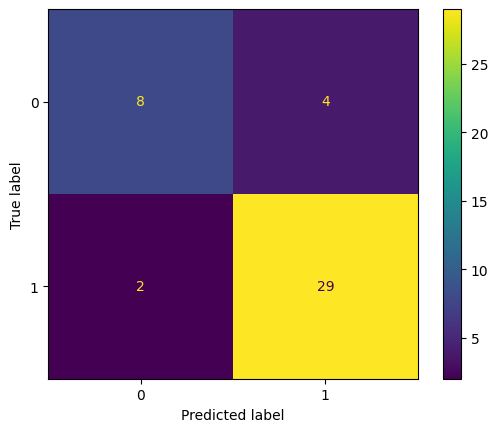

Confusion Matrix:
[[ 8  4]
 [ 2 29]]


In [249]:
# Fit the pipeline
display(pipe_xgb.fit(X_train, y_train))

# Predict and evaluate
y_pred_xgb = pipe_xgb.predict(X_test)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))


# Plot Confusion Matrix
confusion_matrix(y_test, y_pred_xgb)
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_xgb)).plot()
plt.show()

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

### Model Evaluation

Before evaluating our model lets define our metrics and understand which the most important Scores to look At based on our problem based in our project.

**Problem Definition**

    Develop a predictive model to determine the likelihood of a graduate securing a job based on academic and non-academic factors.

**Important Metrics**

Based on that problem definition we can try to solve the problem using three metrics based on its importance;

  1. Firstly, we want the higher scores on **Accuracy** for overall performance and **F1-Score**, which harmonized both classes.

    **Impact**: How well this model predicting if the students actually get placed and not get placed.

  2. Minimizing **False Negative** or the ability of the model to predict student 'Not Placed' when actually the student is placed. We will look at the Recall for Class 1

    **Impact:** *We will falsely classify student who actually get placed/job*

  3. Lastly minimizing **False Positive** or the ability of the model on predicting Placed when not Placed. We will looo=k at *Precision* for Class 1.

    **Impact:** *This will reduce the missleading report based on the academic and non academic factors*




In [250]:
# Models Comparison Dataframe

models = {
    "Random Forest": pipe_rf,
    "Decision Tree": pipe_dt,
    "KNN": pipe_knn,
    "SVM": pipe_svm,
    "XGBoost": pipe_xgb
}

# Metrics for overall comparison
overall_metrics = {
    'Precision' : precision_score,
    'Recall' : recall_score,
    'Accuracy' : accuracy_score,
    'F1-Score' : f1_score,
}

df_model = pd.DataFrame(columns = models.keys(), index=overall_metrics.keys())

for metric_name, metric_func in overall_metrics.items():
  for model_name, model_pipe in models.items():
    df_model.loc[metric_name, model_name] = metric_func(y_test, model_pipe.predict(X_test))

print("Overall Metrics Comparison Class 1 ('Placed'):")
display(df_model)

# Metrics specifically for Class 0 ('Not Placed')
class_0_metrics = {}

for model_name, model_pipe in models.items():
    y_pred = model_pipe.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    class_0_metrics[model_name] = {
        'Precision (Class 0)': report['0']['precision'],
        'Recall (Class 0)': report['0']['recall'],
        'F1-Score (Class 0)': report['0']['f1-score']
    }

df_class_0 = pd.DataFrame.from_dict(class_0_metrics, orient='index')

print("\nClass 0 ('Not Placed') Metrics Comparison:")
display(df_class_0.T)

Overall Metrics Comparison Class 1 ('Placed'):


,Random Forest,Decision Tree,KNN,SVM,XGBoost
Precision,0.848485,0.83871,0.925926,0.878788,0.878788
Recall,0.903226,0.83871,0.806452,0.935484,0.935484
Accuracy,0.813953,0.767442,0.813953,0.860465,0.860465
F1-Score,0.875,0.83871,0.862069,0.90625,0.90625



Class 0 ('Not Placed') Metrics Comparison:


,Random Forest,Decision Tree,KNN,SVM,XGBoost
Precision (Class 0),0.700000,0.583333,0.625000,0.800000,0.800000
Recall (Class 0),0.583333,0.583333,0.833333,0.666667,0.666667
F1-Score (Class 0),0.636364,0.583333,0.714286,0.727273,0.727273


We can see the from the result of the classification report for all models. We will focus only on identifying our importance metrics that we have define earlier.

**Key inisght from the importance matrics:**

1. Overall Perfomance using **`Accuracy`**, we can see that **`SVM` and `XGBoost`** has the highest overall scores with (0.90).

2. **'SVM` and `XGBoost` have the highest recall (0.935)** ➡ This is correctly identify students who only WILL be placed. ➡ Minimize False Negative

3. **`KNN` has the highest precision with (0.926)** ➡ This is correctly identify when all student will be placed and it is correct they will be placed. ➡ Minimize False Positive

Therefore, it will be save to conclude that **the best baseline model** evaluation for harmonized view by accuracy *(1st priority)* and to minimize false negatives *(2nd priority)* is **SVM/XGBoost**

### Cross Validation

Another method we can do to get more reliable decision on our best model is to do cross validation. We can compare between baseline models on unseen data before training.

We will be using CV=5 or performing 5-fold  based on the best practice iteration in cross validations to reasonably return a better scores.

On the metrics we will look at the 1st priority metrics **F1** by 5 iterarion and **ROC-AUC** where we can see the variabilty and consistency of .the model perfromance.

In [251]:

# Define models
models_to_evaluate = [
    {"name": "Random Forest", "pipe": pipe_rf},
    {"name": "Decision Tree", "pipe": pipe_dt},
    {"name": "KNN", "pipe": pipe_knn},
    {"name": "SVM", "pipe": pipe_svm},
    {"name": "XGBoost", "pipe": pipe_xgb}
]

cv_results = []

# Encode the full target variable 'y'
le = LabelEncoder()
y_encoded = le.fit_transform(y)


# Iterate directly through the list of model dictionaries
for model_data in models_to_evaluate:
    name = model_data['name']
    pipe = model_data['pipe']

    scores_acc = cross_val_score(pipe, X, y_encoded, cv=5, scoring='accuracy', n_jobs=-1)

    scores_auc = cross_val_score(pipe, X, y_encoded, cv=5, scoring='roc_auc', n_jobs=-1)

    # Save Results
    cv_results.append({
        'Model': name,
        'CV Accuracy Mean': scores_acc.mean(),
        'CV Accuracy Std': scores_acc.std(),
        'CV ROC-AUC Mean': scores_auc.mean(),
        'CV ROC-AUC Std': scores_auc.std()
    })

# Create and display DataFrame
cv_df = pd.DataFrame(cv_results)
display(cv_df.sort_values('CV ROC-AUC Mean', ascending=False).reset_index(drop=True))

,Model,CV Accuracy Mean,CV Accuracy Std,CV ROC-AUC Mean,CV ROC-AUC Std
0,SVM,0.832558,0.057719,0.916921,0.029908
1,XGBoost,0.823256,0.031546,0.911962,0.042935
2,Random Forest,0.832558,0.037209,0.907831,0.029052
3,KNN,0.804651,0.037786,0.851598,0.046592
4,Decision Tree,0.767442,0.053031,0.742933,0.074201


The dataframe above tells us the Mean or Average Accuracy and ROC-AUC of each models after 5-Fold iteration to cross validate on train test/split.

- Consistently, on CV Accuracy Mean Scores we can see that **XGBoost and SVM** again have highest scores (0.83)

- While decision Tree and **KNN** perfrom slightly lowest at (0.8) and (0.7) respectively.

And another metrics that we tested in this cross validation to measures the variability and consistency of the model is ROC-AUC. To measure the models that has a lower standard deviation means that it has more consistent performance while higher number means more sensitive.

- Conversely, **SVM and Random Forest** shows a more consistent scores with low standard deviation < (0.3) while XGBoost is slightly higher.

- However, in terms of ROC-AUC means **XGboost** is till amongst the higher.

### Best Model Selection

**The Final Selection**

The best model from the evaluation is selected based on the highest mean accuracy and ROC-AUC scores from cross-validation. Which is the **SVM model** with a mean accuracy of 0.83 and ROC-AUC of 0.91.

The best model from our evalutaion is selected based on the highest mean accuracy and ROC-AUC scores from cross-validation and the best model from baseline training.

- Which is the **XGBoost** with mean accuracy of 0.83 and ROC-AUC of 0.91 on cross validaton.

- And **XGBoost** from baseline model with accuracy of 0.86 and recall score 0.96

### Hyperparameter Tuning

In this last section of the modelling, we will focus on optimization of our best model that we chose which was **XGBoost**. We will be using GridSearchCV with a sets of parameter grid combine with again cross validation to find the best parameters.

We are expecting a better performance vs our default baseline model after tuning.

#### Define Hyperparameter

We will be using these parameters with different sets of numbers.

- n_estimators: Number of trees built.

- max_depth: Maximum depth of each tree.

- learning_rate: How much each tree's prediction impacts the total.

- subsample: Fraction of data used to train each tree.

- colsample_bytree: Fraction of features used to train each tree.

In [252]:
# Define the parameter grid for XGBoost
param_grid_xgb = {
    'xgbclassifier__n_estimators': [50, 100, 200],
    'xgbclassifier__max_depth': [3, 5, 7],
    'xgbclassifier__learning_rate': [0.01, 0.1, 0.2],
    'xgbclassifier__subsample': [0.8, 1.0],
    'xgbclassifier__colsample_bytree': [0.8, 1.0]
}

In [253]:
param_grid_xgb

{'xgbclassifier__n_estimators': [50, 100, 200],
 'xgbclassifier__max_depth': [3, 5, 7],
 'xgbclassifier__learning_rate': [0.01, 0.1, 0.2],
 'xgbclassifier__subsample': [0.8, 1.0],
 'xgbclassifier__colsample_bytree': [0.8, 1.0]}

We will be recycle the same pipeline from the baseline model of XGBoost

In [254]:
pipe_xgb

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both'))]),
                                                  Index(['Secondary_Percentage', 'Higher_Secondary_Percentage',
       'Degree_Percentage', 'Entrance_Test_Percentage', 'Mba_Percentage'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncod...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

#### Hyperparameter Training and Evaluation

In [255]:
%%time

# Perform Grid Search with Cross-Validation
grid_search_xgb = GridSearchCV(pipe_xgb, param_grid_xgb,
                               scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_search_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
CPU times: user 23.3 s, sys: 521 ms, total: 23.8 s
Wall time: 54.5 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('winsorizer',
                                                                                          Winsorizer(capping_method='iqr',
                                                                                                     fold=1.5,
                                                                                                     tail='both'))]),
                                                                         Index(['Secondary_Percentage', 'Higher_Secondary_Percentage',
       'Degree_Percentage', 'Entrance_Test_Percentage', 'Mba_Percentage'],
      dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(s...
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'xgbclassifier__colsample_bytree': [0.8, 1.0],
                         'xgbclassifier__learning_rate': [0.01, 0.1, 0.2],
                         'xgbclassifier__max_depth': [3, 5, 7],
                         'xgbclassifier__n_estimators': [50, 100, 200],
                         'xgbclassifier__subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [256]:
# Display the best parameters and score
print("Best parameters found: ", grid_search_xgb.best_params_)
print("Best Accuracy score: ", grid_search_xgb.best_score_)

Best parameters found:  {'xgbclassifier__colsample_bytree': 0.8, 'xgbclassifier__learning_rate': 0.2, 'xgbclassifier__max_depth': 7, 'xgbclassifier__n_estimators': 100, 'xgbclassifier__subsample': 0.8}
Best Accuracy score:  0.8783193277310926


The model training on the train set returns a good number on the accuracy scores of 0.87 afther using the best parameters found using GridSearchCV.

Lets see what would be the scores on classification report for the test sets. Will yield a better score than the baseline model? Let's find the answer.

**Evaluate The Best Model**

Run the prediction and report on the test set to reveal the hypertuned scores.

              precision    recall  f1-score   support

           0       0.70      0.58      0.64        12
           1       0.85      0.90      0.88        31

    accuracy                           0.81        43
   macro avg       0.77      0.74      0.76        43
weighted avg       0.81      0.81      0.81        43



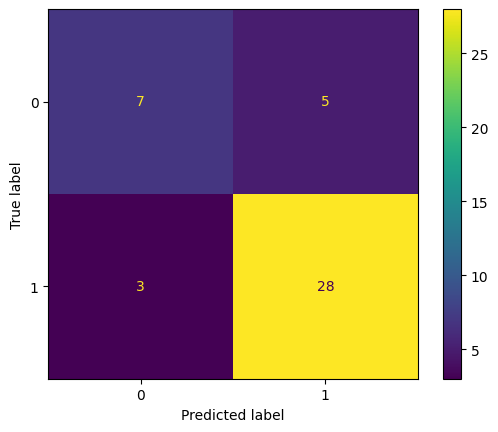

In [257]:
# Evaluate the best model on the test set
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_xgb_best = best_xgb_model.predict(X_test)

print(classification_report(y_test, y_pred_xgb_best))

# Plot Confusion Matrix
confusion_matrix(y_test, y_pred_xgb_best)
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_xgb_best)).plot()
plt.show()

In [258]:
#Display the classification report
models = {
     'XGBoost Tuned': best_xgb_model
}

metrics = {
    'Precision' : precision_score,
    'Recall' : recall_score,
    'Accuracy' : accuracy_score,
    'F1-Score' : f1_score,
}

model_tuning = pd.DataFrame(columns = models.keys(), index=['Precision','Recall','Accuracy', 'F1-Score'])

for metric in metrics.keys():
  for model in models.keys():
    model_tuning.loc[metric, model] = metrics[metric](y_test, models[model].predict(X_test))

display(model_tuning)

,XGBoost Tuned
Precision,0.848485
Recall,0.903226
Accuracy,0.813953
F1-Score,0.875


**Compared Result Tuned vs Best Model**

In [259]:
# Saving the baseline model classifcation report
xgb_score_baseline = df_model.rename(columns={'XGBoost': 'XGBoost Baseline'})
xgb_score_baseline = xgb_score_baseline['XGBoost Baseline']

# Compared result baseline vs tuned
compare_result = pd.merge(model_tuning, xgb_score_baseline, left_index=True, right_index=True)
compare_result

,XGBoost Tuned,XGBoost Baseline
Precision,0.848485,0.878788
Recall,0.903226,0.935484
Accuracy,0.813953,0.860465
F1-Score,0.875,0.90625


SURPRISINGLY, the result if is **NOT** meeting up to our expecatation to have the tuned models would yielded better performed model. Instead, **XGBoost Tuned resulted worse-perfoming model** compared to baseline model in all scores.

The reason is we might not have initialized the optimal parameters that works best on the grid due to time constraint.

**Bottomline**

Therefore, we will then instead declare the **Baseline XGBoost model performed better** than the tuned version for the class (1).

# Model Saving

In [260]:
# Save the best model to pickle

pickle.dump(best_xgb_model, open('model_xgb.pkl', 'wb'))

# Model Inference

Please refer on the other Notebook @ **P1_syarief_qayum_inference.ipynb**

# Conclusion

Let's conclude this project with a summary and what's in it for the University MBA program moving forward.

**Summary**

In this project we are sucessfully develop a predictive model to asses the likelihood of the MBA student to get a job placement.

In the early stage of the project we answer problem statement questions in the EDA phases find some factors that impacts the job placement such as academic scores and degree majors.

We then leveraging these factors to create the Baseline model using different algorithm. The result? XGBoost shows a significant stong performance.In the later stage we tried to improve the performance of the XGBoost model by doing hyperparameter tuning but it failed to improve the performance.

The output for this project is a deployment model that can be used by the university to predict the job placement for their student and identifying what could be improved internally and it can also be accessed by student do a self reclection on what strategic plan can be done to increse employablity.



**Recommendation**

So, Whats in it for the university?

- **Targeted Student Filtering/Admission:** Using this model the university can identify students that are high risk of not being placed earlier and do an intervention before admitting them to the MBA progam (Prevention or Filtering incoming students)

- **Optimize Resource Allocation:** University can craete a tailored career service and allocate their resource to those students who need it the most.

- **Curriculum & Program Improvment:** Academically, the MBA program can improve their curriculum by identifying which non academic or academic factors that are lacking during the program. Or Creating a new program that can accomodates more students to excel.

**Next Improvement**

What can be done better next time?

- **Model Improvement:** As we mentioned before we can still refine XGBoost hyperparameter for this project, with extended time.

- **Handling Imbalance:** We can experiment with alternative approach on the data balancing using parameter at SMOTE.

- **Advance Feature Engineering:** We can try to explore more of the dataset by doing faeture creation by combining exicsting featrues.

- **Gather more Data:** We believe that there will be more data can be explored or attained from the university students such as Students Behavior, Previous company domain, technical skills or More Demographics Data.